# Лабораторная работа: Анализ данных о пассажирах Титаника

---

В рамках лабораторной работы необходимо провести ручной анализ данных о пассажирах затонувшего корабля Титаник. Будут оцениваться четкость ответов на вопросы, аккуратность отчета и кода.

## Задание

1. Загрузите набор данных: файл `train.csv` на странице учебного соревнования [Titanic: Machine Learning from Disaster](http://www.kaggle.com/c/titanic-gettingStarted/data). Там же вы найдете описание формата файла. Для загрузки файлов необходимо зарегистрироваться в Kaggle, если вы еще не имеете аккаунта. Обратите внимание — `train.csv` содержит не всех пассажиров, меньшая их часть была отложена на контроль (`test.csv`), но можно считать что разбиение было случайным (попадание пассажира в ту или иную группы не зависит от пассажира и его характеристик).
2. Что данные могут рассказать о задаче? Попробуйте содержательно ответить на следующие вопросы, подкрепляя их свидетельствами в виде графиков, гистограмм, приводя статистики распределений (средние, медианы, стандартные отклонения):
  - Как много пассажиров ехало первым классом?
  - Какой возраст имели пассажиры?
  - Коррелируют ли число братьев/сестер с числом родителей/детей?
  - Какое самое популярное женское имя на корабле?
  - Как варьируется цена билета на Титаник?
  - Какие титулы имели пассажиры (примеры титула — Mrs., Mr.), едущие различными классами?
  - Есть ли зависимость между классом и номером билета?
  - Какой части пассажиров удалось выжить?
3. Попробуйте вручную найти закономерности, описывающие выживших пассажиров:
  - Верно ли, что женщины выживали чаще мужчин?
  - Верно ли, что чаще выживали пассажиры с более дорогими билетами?
  - Найдите закономерности, точно описывающие группу выживших пассажиров (все пассажиры, попадающие под правило — выжили). Что можно сказать про сложность и интерпретацию этих закономерностей? Есть ли среди них логичные? Есть ли примеры _ложных_ закономерностей? 

## Отчет

Результат лабораторной работы — **отчет**. Мы предпочитаем принимать отчеты в формате ноутбуков IPython (`ipynb`-файл). Нам не интересен ваш код. Чем меньше кода, тем лучше всем: нам — меньше проверять, вам — проще найти ошибку или дополнить эксперимент.

Постарайтесь сделать ваш отчет **интересным рассказом**, последовательно отвечающим на вопросы из задания.

Не забывайте подписывать оси на графиках!

![](http://imgs.xkcd.com/comics/convincing.png)

## Инструменты для выполнения задания

### IPython Notebook

  * [Галерея интересных ноутбуков](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks)

### Библиотеки Python

  * [NumPy](http://www.numpy.org/)
    - [руководство для пользователей Matlab](http://wiki.scipy.org/NumPy_for_Matlab_Users)
  * [Pandas](http://pandas.pydata.org/)
    - [пример работы с данными при помощи pandas](http://nbviewer.ipython.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb)
  * [Matplotlib](http://matplotlib.org/index.html)
    - [pyplot](http://matplotlib.org/api/pyplot_api.html) — эмуляция функционала графопостроений в Matlab
    - [галерея примеров](http://matplotlib.org/gallery.html)
  * [SciPy](http://scipy.org/)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Как много пассажиров ехало первым классом?

(array([ 216.,  184.,  491.]),
 array([ 1.        ,  1.66666667,  2.33333333,  3.        ]),
 <a list of 3 Patch objects>)

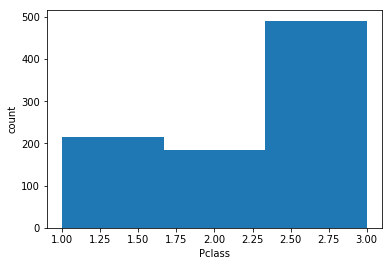

In [4]:
len(train[train['Pclass'] == 1])
plt.ylabel('count')
plt.xlabel('Pclass')
plt.hist(train['Pclass'], bins=3)

По гистограмме видно, что первым классом ехало 216 человек, что примерно вдвое меньше человек чем третьим (491) и немного больше чем вторым (184)

#### Какой возраст имели пассажиры?

In [5]:
train['Age'].mean(), train['Age'].median()

(29.69911764705882, 28.0)

(array([  54.,   46.,  177.,  169.,  118.,   70.,   45.,   24.,    9.,    2.]),
 array([  0.42 ,   8.378,  16.336,  24.294,  32.252,  40.21 ,  48.168,
         56.126,  64.084,  72.042,  80.   ]),
 <a list of 10 Patch objects>)

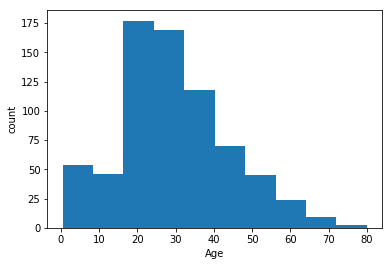

In [6]:
plt.ylabel('count')
plt.xlabel('Age')
plt.hist(train['Age'].dropna())

Видно, что большинство пассажиров были в возрасте 18-30 лет, также довольно много людей 30-35 лет. Далее чем больше количество лет, тем меньше пассажиров с таким возрастом. Также выделяется группа детей (0-18) лет. Средний возраст в датасете - 29.6 лет, медианный - 28.

#### Коррелируют ли число братьев/сестер с числом родителей/детей?

In [7]:
train[['SibSp', 'Parch']].corr()

,SibSp,Parch
SibSp,1.000000,0.414838
Parch,0.414838,1.000000


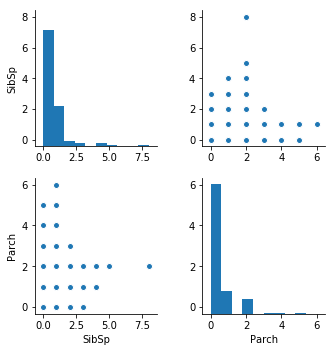

In [8]:
sns.pairplot(train[['SibSp', 'Parch']])

По коэффициенту корреляции 0.41 можно сказать, что есть слабая корреляция. Однако, по построенному pairplot'у нельзя увидеть какой-либо линейной зависимости. Так как корреляция - мера линейной зависимости, то в данном случае смотреть на коэффициент бессмысленно, так как линейной зависимости нет.

#### Какое самое популярное женское имя на корабле?

In [121]:
def get_first_name(name):
    s = name.split()
    if 'Mrs.' in s:
        for i in range(s.index('Mrs.'), len(s)):
            if s[i].startswith("("):
                return s[i][1:].replace(')', '')
        return s[s.index('Mrs.') + 1]
    if 'Miss.' in s:
        return s[s.index('Miss.') + 1]

train['FirstName'] = train[train['Sex'] == 'female']['Name'].map(get_first_name)
train['FirstName'].value_counts()[:10]

Anna         15
Mary         14
Elizabeth    11
Margaret     10
Alice         6
Bertha        5
Helen         5
Maria         5
Emily         4
Annie         4
Name: FirstName, dtype: int64

Самое популярное женское имя - Анна. Следом идут Мэри и Элизабет.

#### Как варьируется цена билета на Титаник?

In [10]:
train['Fare'].value_counts().nlargest(20)

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
10.5000    24
7.9250     18
7.7750     16
26.5500    15
0.0000     15
7.2292     15
7.8542     13
8.6625     13
7.2500     13
7.2250     12
16.1000     9
9.5000      9
24.1500     8
15.5000     8
56.4958     7
Name: Fare, dtype: int64

In [11]:
train['Fare'].value_counts().sort_index()[100:]

106.4250    2
108.9000    2
110.8833    4
113.2750    3
120.0000    4
133.6500    2
134.5000    2
135.6333    3
146.5208    2
151.5500    4
153.4625    3
164.8667    2
211.3375    3
211.5000    1
221.7792    1
227.5250    4
247.5208    2
262.3750    2
263.0000    4
512.3292    3
Name: Fare, dtype: int64

(array([ 732.,  106.,   31.,    2.,   11.,    6.,    0.,    0.,    0.,    3.]),
 array([   0.     ,   51.23292,  102.46584,  153.69876,  204.93168,
         256.1646 ,  307.39752,  358.63044,  409.86336,  461.09628,
         512.3292 ]),
 <a list of 10 Patch objects>)

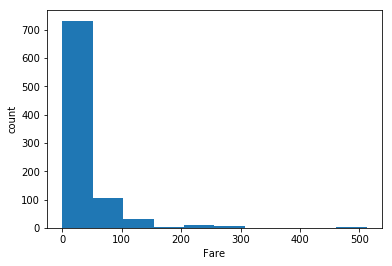

In [12]:
plt.ylabel('count')
plt.xlabel('Fare')
plt.hist(train['Fare'])

По гистограмме видно, что большинство билетов было дешевле 100 фунтов. Если посмотреть на топ 20 значений по количеству пассажиров с данной ценой билета, можно сказать, что у большинства пассажиров билеты были дешевле 27 фунтов. Также были билеты, которые стоили более 100 фунтов (до 500), но их очень мало (есть несколько билетов за 100-160, несколько за 211-263 и три билета за 512).

#### Какие титулы имели пассажиры (примеры титула — Mrs., Mr.), едущие различными классами?

In [13]:
def get_title(name):
    return name.split(',')[1].split('.')[0]

train['Title'] = train['Name'].map(get_title)

In [14]:
train[train['Pclass'] == 1]['Title'].value_counts()

 Mr              107
 Miss             46
 Mrs              42
 Dr                5
 Master            3
 Major             2
 Mlle              2
 Col               2
 Don               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Mme               1
 Lady              1
 Sir               1
Name: Title, dtype: int64

In [15]:
train[train['Pclass'] == 2]['Title'].value_counts()

 Mr        91
 Mrs       41
 Miss      34
 Master     9
 Rev        6
 Dr         2
 Ms         1
Name: Title, dtype: int64

In [16]:
train[train['Pclass'] == 3]['Title'].value_counts()

 Mr        319
 Miss      102
 Mrs        42
 Master     28
Name: Title, dtype: int64

Видно, что среди пассажиров первого класса намного больше редких титулов (например, Don, Major и прочие). Среди пассажиров второго класса редкие титулы также встречаются, но их меньше. В третьем классе редких титулов нет, но интересно, что титулов Miss (незамужних женщин) в нем в два с лишним раза больше, чем титулов Mrs (замужних), когда как в двух других классах количество Miss и Mrs примерно одинаковое. Больше всего во всех классах титулов Mr.

#### Есть ли зависимость между классом и номером билета?

In [17]:
def get_ticket_label(ticket):
    s = ticket.split(' ')
    if len(s) > 1:
        return s[0]
    return None

train['TicketLabel'] = train['Ticket'].map(get_ticket_label)

In [18]:
train[train['Pclass'] == 1]['TicketLabel'].value_counts()

PC        60
WE/P       2
W.E.P.     1
F.C.       1
Name: TicketLabel, dtype: int64

In [19]:
train[train['Pclass'] == 2]['TicketLabel'].value_counts()[:5]

C.A.        19
S.O.C.       5
F.C.C.       5
SC/PARIS     5
SC/Paris     4
Name: TicketLabel, dtype: int64

In [20]:
train[train['Pclass'] == 3]['TicketLabel'].value_counts()[:5]

STON/O        12
A/5           10
SOTON/O.Q.     8
CA.            8
C.A.           8
Name: TicketLabel, dtype: int64

В обсуждениях датасета [можно найти](https://www.kaggle.com/c/titanic/discussion/11127) обсуждение номеров билетов. Там обсуждаются интересные предположения. В частности, по номерам билета можно определить, например, няню или сопровождающего ребенка взрослого (у них скорее всего будет близкий номер). Также там говорится, что префикс билета возможно означает точку продажи билета или точку посадки. Если посчитать количество для каждого такого префикса по классам, то отчетливо видно, что у почти всех, кто едет первым классом, префикс `PC`, так что, возможно они покупали билеты в одном месте. Для второго класса у большинства пассажиров префикс `C.A.`, а для третьего - `STON/O` и `A/5`.

#### Какой части пассажиров удалось выжить?

In [21]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [22]:
print(f'Survived: {round(100*train["Survived"].value_counts()[1]/len(train), 2)}%')

Survived: 38.38%


342 из 891 пассажирам удалось выжить.

----

#### Верно ли, что женщины выживали чаще мужчин?

In [92]:
fem = train[train['Sex'] == 'female']
fem_survived = fem['Survived'].value_counts()
print(f'fem on board: {len(fem)}, survived: {fem_survived[1]} ({round(100*fem_survived[1]/len(fem), 2)}%)')

man = train[train['Sex'] == 'male']
man_survived = man['Survived'].value_counts()
print(f'men on board: {len(man)}, survived: {man_survived[1]} ({round(100*man_survived[1]/len(man), 2)}%)')

fem on board: 314, survived: 233 (74.2%)
men on board: 577, survived: 109 (18.89%)


Верно. Из 577 мужчин выжило всего 109, среди 314 женщин выжили 233.

#### Верно ли, что чаще выживали пассажиры с более дорогими билетами?

Text(0,0.5,'Fare')

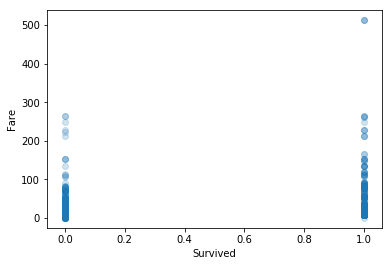

In [30]:
plt.scatter(train['Survived'], train['Fare'], alpha=0.2)
plt.xlabel("Survived")
plt.ylabel("Fare")

In [89]:
rich = train[train['Fare'] >= 100]
rich_survived = rich['Survived'].value_counts()
print(f'rich on board: {len(rich)}, survived: {rich_survived[1]} ({round(100*rich_survived[1]/len(rich), 2)}%)')

poor = train[train['Fare'] < 100]
poor_survived = poor['Survived'].value_counts()
print(f'poor on board: {len(poor)}, survived: {poor_survived[1]} ({round(100*poor_survived[1]/len(poor), 2)}%)')

rich on board: 53, survived: 39 (73.58%)
poor on board: 838, survived: 303 (36.16%)


Да, верно. На scatterplot'е отчетливо видно, как при пересечении определенного порога (где-то в 100 фунтов) доля выживших становится больше. Это подтверждается более точной оценкой: среди тех, чьи билеты стоили более 100 фунтов, выжило 73.6 процента, среди тех, у кого билеты стоили менее 100 фунтов - 36.16%.

#### Найдите закономерности, точно описывающие группу выживших пассажиров

Логика подсказывает, что сначала спасали женщин, детей и стариков. Возможно, пассажиры с более дорогими билетами также были в приоритете при спасении. Если перебрать комбинации этих параметров, скорее всего найдется такая группа.

Text(0,0.5,'Age')

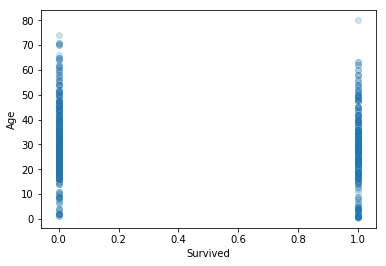

In [72]:
plt.scatter(train['Survived'], train['Age'], alpha=0.2)
plt.xlabel("Survived")
plt.ylabel("Age")

По графику видно, что действительно среди пассажиров возрастной группы до 10 лет намного больше выживших. Про стариков такого сказать по графику нельзя. Посмотрим на пассажиров до 10 лет:

In [120]:
train[(train['Age'] < 10)]['Survived'].value_counts()

1    38
0    24
Name: Survived, dtype: int64

Погибших там все еще достаточно много, группу выживших среди детей выделить проблематично.

Попробуем теперь выделить группу выживших среди женщин (мы знаем, что они выживали чаще мужчин) и пассажиров с дорогими билетами:

In [61]:
train[(train['Sex'] == 'female') & (train['Fare'] > 70)]['Survived'].value_counts() # Почти получилось!

1    62
0     2
Name: Survived, dtype: int64

In [68]:
train[(train['Sex'] == 'female') & (train['Fare'] > 70) & (train['Age'] > 30)]['Survived'].value_counts()

1    36
Name: Survived, dtype: int64

Ура! Все барышни за 30 с дорогими билетами выжили. Это пример несложной и легко интерпретируемой закономерности, которая выглядит логично.

In [106]:
train[train['FirstName'] == 'Emily']['Survived'].value_counts()

1    4
Name: Survived, dtype: int64

Вот пример нелогичной и ложной закономерности. Все девушки с именем Эмилии - выжили.